#### Práctica 2: Tipología y ciclo de vida de los datos
# xxxTÍTULO AQUÍ xxx
#### Autores: Víctor H. Ayala Sánchez y Clara M. Roca de la Concha

https://archive.ics.uci.edu/ml/datasets/heart+disease

# Tabla de contenidos

- 1. [Descripción del dataset](#1.-Descripción-del-dataset)
- 2. [Integración y selección de los datos de interés a analizar](#2.-Integración-y-selección-de-los-datos-de-interés-a-analizar)
- 3. [Limpieza de los datos](#3.-Limpieza-de-los-datos)
    - 3.1. [¿Los datos contienen ceros o elementos vacíos?](#3.1.-¿Los-datos-contienen-ceros-o-elementos-vacíos?)
    - 3.2. [Identifica y gestiona los valores extremos](#3.2.-Identifica-y-gestiona-los-valores-extremos)
- 4.[Análisis de los datos](#4.-Análisis-de-los-datos)
    - 4.1.[Selección de los grupos de datos que se quieren analizar/comparar](#4.1.-Selección-de-los-grupos-de-datos-que-se-quieren-analizar/comparar)
    - 4.2.[Comprobación de la normalidad y homogeneidad de la varianza](#4.2.-Comprobación-de-la-normalidad-y-homogeneidad-de-la-varianza)
    - 4.3.[Aplicación de pruebas estadísticas para comparar los grupos de datos](#4.3.-Aplicación-de-pruebas-estadísticas-para-comparar-los-grupos-de-datos)
- 5.[Representación gráfica](#5.-Representación-gráfica)
- 6.[Resolución del problema](#6.-Resolución-del-problema)
- 7.[Código](#7.-Código)
- 8.[Vídeo](#8.-Vídeo)
- [Contribuciones](#Contribuciones)

# Librerías

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descripción del dataset

**¿Por qué es importante y qué pregunta/problema pretende responder?**			

En principio, este dataset trata de explicar la enfermedad cardiaca a partir de una serie de factores. No obstante, partamos de la base que este dataset es útil para practicar, pero no tanto para resolver un problema real, tal como ya se comenta [en el foro del propio dataset en Kaggle](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/249239). 

En un análisis preliminar de los datos, podemos comprobar que el archivo `heart.csv` consta de 303 registros y 14 variables. La información de Kaggle es escasa, puesto que no proporciona información espacio-temporal sobre los datos. Tampoco proporciona citas adicionales sobre las fuentes, siendo que es improbable que los que proporcionan este dataset sean los autores de la investigación. Nótese que señalan la procedencia 'online' y el método 'crawling'. 

Una búsqueda rápida nos llevará a encontrar [el origen de los datos](https://archive.ics.uci.edu/ml/datasets/heart+disease). Se trata de un popular dataset donado en 1988. El estudio original consta de 4 ubicaciones:
1. Budapest (Hungría): Hungarian Institute of Cardiology, Andras Janosi, M.D.
2. Zurich (Suiza): University Hospital, William Steinbrunn, M.D.
3. Basilea (Suiza): University Hospital, Matthias Pfisterer, M.D.
4. Cleveland (Estados Unidos): V.A. Medical Center, Long Beach and Cleveland Clinic Foundation, Robert Detrano, M.D., Ph.D.

Originalmente, constaba de 76 atributos, si bien "todos los experimentos publicados se refieren a 14 atributos", tal como se nos indica [en el repositorio original](https://archive.ics.uci.edu/ml/datasets/heart+disease). Presumiblemente tenemos el dataset de Cleveland, el más popular en los estudios de Machine Learning. 

Por lo tanto, tenemos en nuestras manos un dataset cuya fuente original no está citada, con un número de registros bastante menor al ideal en un estudio de estas características y de una antigüedad considerable. Presenta además algunas dificultades, como el hecho de que algunos valores no se corresponden con los establecidos en la descripción de los datos. Por ejemplo, la variable `cp` ('chest pain type') va del 0 al 3 mientras que en la descripción –tanto en kaggle como en el repositorio de UCI– va del 1 al 4.

El motivo por el que no tomamos directamente el dataset ofrecido en la fuente original es porque han tenido algún problema con el archivo y puede estar corrupto, tal como indican en su WARNING del [repositorio](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/).

Dicho esto, pasamos a describir las variables que tenemos entre manos. El procedimiento ha sido comprobar las equivalencias con el dataset original y las descripciones, tanto de kaggle como de UCI. El valor que está más descolocado es `cp`, pero, ante la duda, se ha añadido un [tercer .csv](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download) para comprobar la codificación:

`age`: edad del paciente

`sex`: sexo del paciente

        1 = hombre
        0 = mujer
        
`cp`: tipo de dolor de pecho. 

        3 = angina típica (1 en el original)
        2 = dolor no anginoso (3 en el original)
        1 = angina atípica (2 en el original)
        0 = asintomático (4 en el original).
`trtbps` : presión sanguínea en reposo (en mm Hg)

`chol` : colesterol en mg/dl

`fbs` : azúcar en sangre en ayunas > 120 mg/dl.

        1 = verdadero
        0 = falso
`restecg` : resultados electrocardiográficos en reposo

        2 = anomalías en la onda ST-T (1 en el original)
        1 = normal (0 en el original)
        0 = hipertrofia ventricular izquierda (2 en el original).
`thalachh` : frecuencia cardiaca máxima alcanzada.

`exng`: angina inducida por el ejercicio

        1 = sí
        0 = no
`oldpeak`: depresión del ST inducida por el ejercicio en relación con el reposo

`slp`: la pendiente del segmento ST de ejercicio máximo.

        2 = pendiente ascendiente (1 en el original)
        1 = sin pendiente (2 en el original)
        0 = pendiente descendente (3 en el original)
`caa`: número de vasos principales (de 0 a 3)

`thall`: Thallium Stress Test, por lo que podemos leer [aquí](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843?sort=votes)

        3 = defecto reversible (7 en el original)
        2 = normal (3 en el original)
        1 = defecto arreglado (6 en el original)

`output`: atributo predicho; diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)

        0 = presencia de enfermedad cardíaca
        1 = ausencia de enfermedad cardíaca

# 2. Integración y selección de los datos de interés a analizar
**Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir.**

# 3. Limpieza de los datos

## 3.1. ¿Los datos contienen ceros o elementos vacíos? 
**Gestiona cada uno de estos casos.**
xxx Análisis de nulls etc. xxx

Los valores 0 en `thall` son nulos.
Los valores 4 en `caa` son nulos.

## 3.2. Identifica y gestiona los valores extremos
**Escribir aquí la solución.**


# 4. Análisis de los datos
## 4.1. Selección de los grupos de datos que se quieren analizar/comparar 
**(p.ej., si se van a comparar grupos de datos, ¿cuáles son estos grupos y
qué tipo de análisis se van a aplicar?)**

## 4.2. Comprobación de la normalidad y homogeneidad de la varianza

## 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos
**En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.**



# 5. Representación gráfica
**Representación de los resultados a partir de tablas y gráficas. Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este punto de la práctica.**

xxx Resuelto a lo largo de la práctica xx

# 6. Resolución del problema
**A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?**

# 7. Código
**Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.**

xx El código se ha ido viendo a lo largo de la práctica xx

# 8. Vídeo
**Realizar un breve vídeo explicativo de la práctica (máximo 10 minutos), donde ambos integrantes del equipo expliquen con sus propias palabras el desarrollo de la práctica, basándose en las preguntas del enunciado para justificar y explicar el código desarrollado. Este vídeo se deberá entregar a través de un enlace al Google Drive de la UOC (https://drive.google.com/...), junto con enlace al repositorio Git entregado.**

# Contribuciones

In [6]:
import pandas as pd
contribuciones = pd.DataFrame()
contribuciones['Contribuciones'] = ['Investigación previa', 'Redacción de las respuestas', 'Desarrollo del código', 'Participación en el vídeo']
contribuciones['Firma'] = ['Víctor H. Ayala, Clara Roca', 'Víctor H. Ayala, Clara Roca', 'Víctor H. Ayala, Clara Roca', 'Víctor H. Ayala, Clara Roca']
contribuciones

,Contribuciones,Firma
0,Investigación previa,"Víctor H. Ayala, Clara Roca"
1,Redacción de las respuestas,"Víctor H. Ayala, Clara Roca"
2,Desarrollo del código,"Víctor H. Ayala, Clara Roca"
3,Participación en el vídeo,"Víctor H. Ayala, Clara Roca"


In [12]:
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


# 2. Preprocesamiento

In [29]:
df = df.replace({
    'cp': {
        0: 'typical angina',
        1: 'atypical angina',
        2: 'non-anginal pain',
        3: 'asymptomatic'
        },
    'sex':{
        1:'Male',
        0:'Female'
    },
    'restecg':{
        0:'Normal',
        1:'ST-T wave abnormality',
        2:'Left ventricular hypertrophy'
    },
    'exng':{
        0:'Yes Angina',
        1:'No Angina'
    },
    'fbs':{
        0:'fastingBloodSugar_false',
        1:'fastingBloodSugar_true'  
    },
    'slp':{
        0:'upsloping',
        1:'flat',
        2:'downsloping'
    }
})

In [30]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,asymptomatic,145,233,fastingBloodSugar_true,Normal,150,Yes Angina,2.3,upsloping,0,1,1
1,37,Male,non-anginal pain,130,250,fastingBloodSugar_false,ST-T wave abnormality,187,Yes Angina,3.5,upsloping,0,2,1
2,41,Female,atypical angina,130,204,fastingBloodSugar_false,Normal,172,Yes Angina,1.4,downsloping,0,2,1
3,56,Male,atypical angina,120,236,fastingBloodSugar_false,ST-T wave abnormality,178,Yes Angina,0.8,downsloping,0,2,1
4,57,Female,typical angina,120,354,fastingBloodSugar_false,ST-T wave abnormality,163,No Angina,0.6,downsloping,0,2,1


# 3. Análisis Exploratorio de Datos

In [31]:
df.describe()

,age,trtbps,chol,thalachh,oldpeak,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,2.313531,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.612277,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,3.000000,1.000000


In [33]:
df[["age","trtbps","chol","thalachh","oldpeak","caa","thall","output"]].groupby("output").describe().T

output                   0           1
age      count  138.000000  165.000000
         mean    56.601449   52.496970
         std      7.962082    9.550651
         min     35.000000   29.000000
         25%     52.000000   44.000000
         50%     58.000000   52.000000
         75%     62.000000   59.000000
         max     77.000000   76.000000
trtbps   count  138.000000  165.000000
         mean   134.398551  129.303030
         std     18.729944   16.169613
         min    100.000000   94.000000
         25%    120.000000  120.000000
         50%    130.000000  130.000000
         75%    144.750000  140.000000
         max    200.000000  180.000000
chol     count  138.000000  165.000000
         mean   251.086957  242.230303
         std     49.454614   53.552872
         min    131.000000  126.000000
         25%    217.250000  208.000000
         50%    249.000000  234.000000
         75%    283.000000  267.000000
         max    409.000000  564.000000
thalachh count  138.000000  165.000000
         mean   139.101449  158.466667
         std     22.598782   19.174276
         min     71.000000   96.000000
         25%    125.000000  149.000000
         50%    142.000000  161.000000
         75%    156.000000  172.000000
         max    195.000000  202.000000
oldpeak  count  138.000000  165.000000
         mean     1.585507    0.583030
         std      1.300340    0.780683
         min      0.000000    0.000000
         25%      0.600000    0.000000
         50%      1.400000    0.200000
         75%      2.500000    1.000000
         max      6.200000    4.200000
caa      count  138.000000  165.000000
         mean     1.166667    0.363636
         std      1.043460    0.848894
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      2.000000    0.000000
         max      4.000000    4.000000
thall    count  138.000000  165.000000
         mean     2.543478    2.121212
         std      0.684762    0.465752
         min      0.000000    0.000000
         25%      2.000000    2.000000
         50%      3.000000    2.000000
         75%      3.000000    2.000000
         max      3.000000    3.000000

## 2.1 Análisis de variables cuantitativas

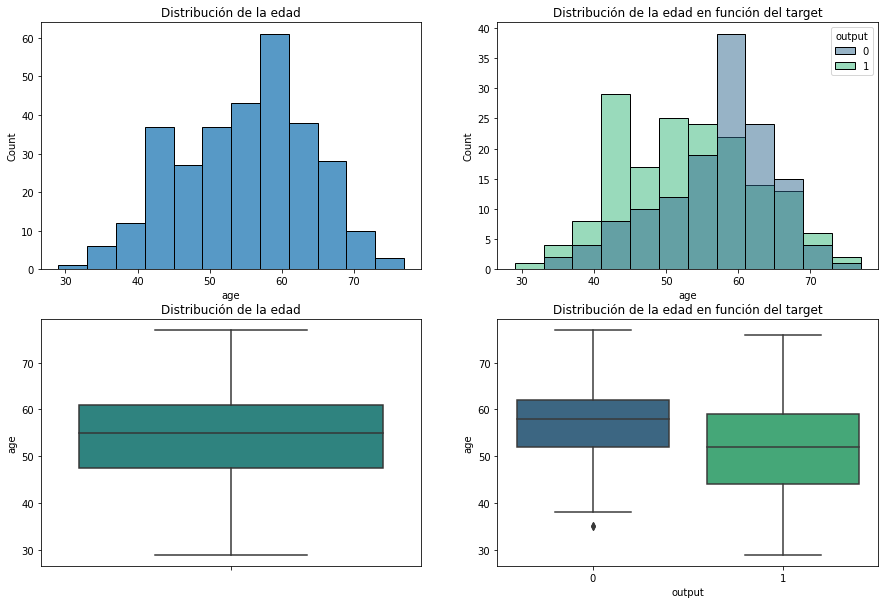

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ax=axes[0,0], x="age", palette="viridis", data=df).set(title='Distribución de la edad')
sns.histplot(ax=axes[0,1], x="age", hue="output",palette="viridis", data=df).set(title='Distribución de la edad en función del target')

sns.boxplot(ax=axes[1,0], y="age" ,palette="viridis", data=df).set(title='Distribución de la edad')
sns.boxplot(ax=axes[1,1], y="age",x ="output", palette="viridis", data=df).set(title='Distribución de la edad en función del target')

plt.show()

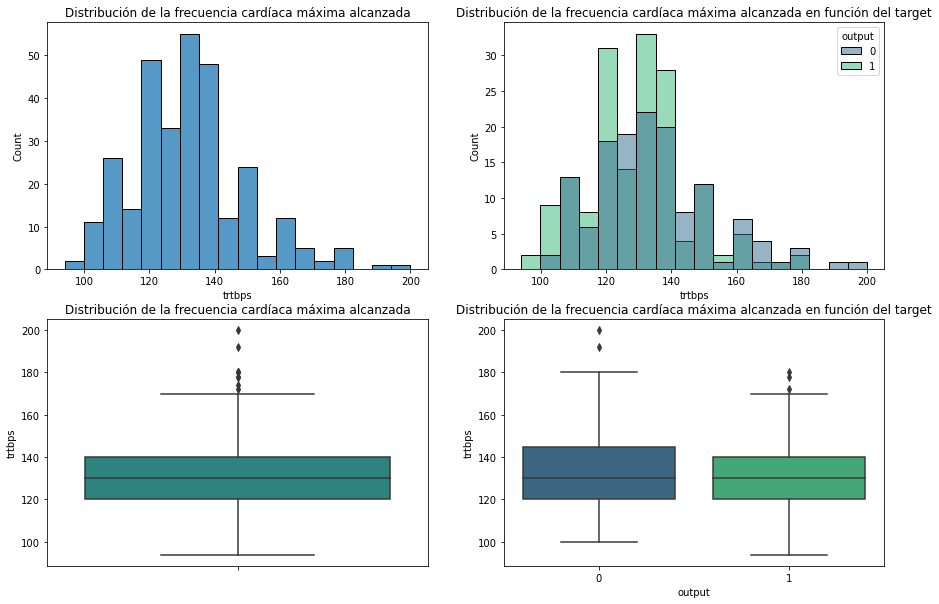

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ax=axes[0,0], x="trtbps", palette="viridis", data=df).set(title='Distribución de la frecuencia cardíaca máxima alcanzada')
sns.histplot(ax=axes[0,1], x="trtbps", hue="output",palette="viridis", data=df).set(title='Distribución de la frecuencia cardíaca máxima alcanzada en función del target')

sns.boxplot(ax=axes[1,0], y="trtbps" ,palette="viridis", data=df).set(title='Distribución de la frecuencia cardíaca máxima alcanzada')
sns.boxplot(ax=axes[1,1], y="trtbps",x ="output", palette="viridis", data=df).set(title='Distribución de la frecuencia cardíaca máxima alcanzada en función del target')

plt.show()

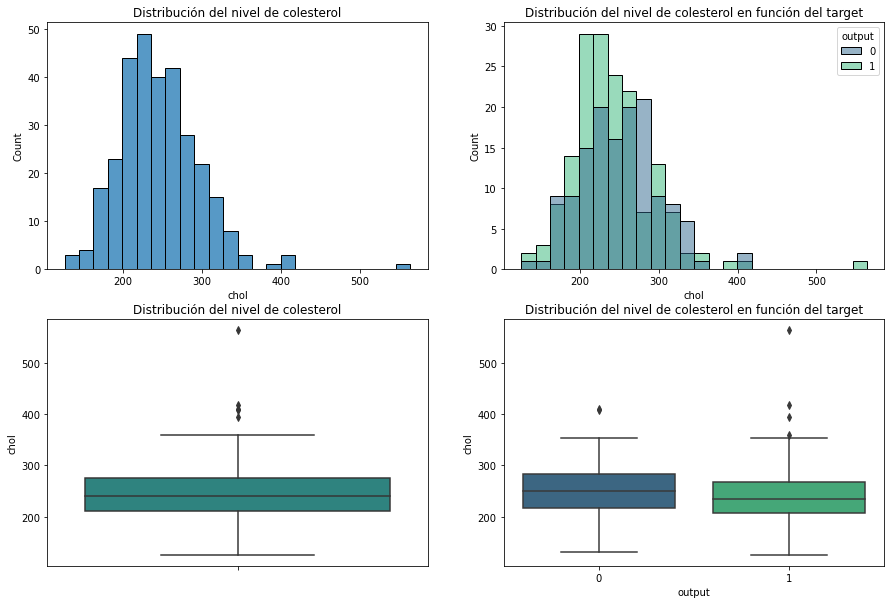

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ax=axes[0,0], x="chol", palette="viridis", data=df).set(title='Distribución del nivel de colesterol')
sns.histplot(ax=axes[0,1], x="chol", hue="output",palette="viridis", data=df).set(title='Distribución del nivel de colesterol en función del target')

sns.boxplot(ax=axes[1,0], y="chol" ,palette="viridis", data=df).set(title='Distribución del nivel de colesterol')
sns.boxplot(ax=axes[1,1], y="chol",x ="output", palette="viridis", data=df).set(title='Distribución del nivel de colesterol en función del target')

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(ax=axes[0,0], x="chol", palette="viridis", data=df).set(title='Distribución del nivel de colesterol')
sns.histplot(ax=axes[0,1], x="chol", hue="output",palette="viridis", data=df).set(title='Distribución del nivel de colesterol en función del target')

sns.boxplot(ax=axes[1,0], y="chol" ,palette="viridis", data=df).set(title='Distribución del nivel de colesterol')
sns.boxplot(ax=axes[1,1], y="chol",x ="output", palette="viridis", data=df).set(title='Distribución del nivel de colesterol en función del target')

plt.show()

## 2.2 Análisis de variables cualitativas